In [1]:
import pandas as pd

# Load cleaned datasets
benin_df = pd.read_csv('../data/benin_clean.csv')
sierra_leone_df = pd.read_csv('../data/sierraleone_clean.csv')
togo_df = pd.read_csv('../data/togo_clean.csv')

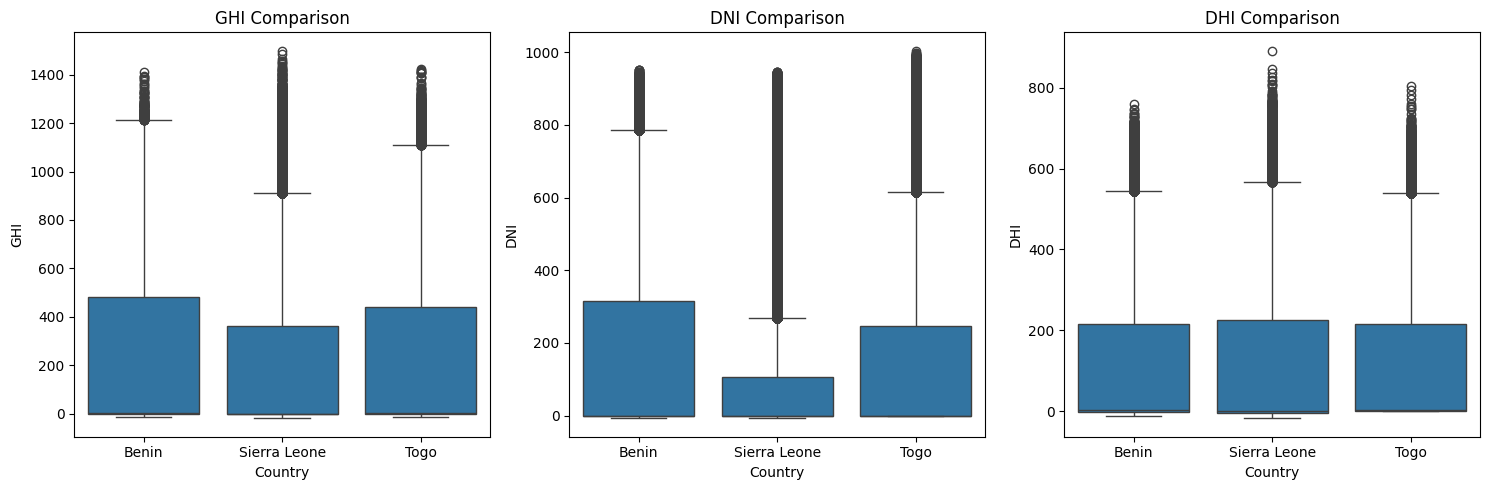

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Add a country column for each dataframe
benin_df['Country'] = 'Benin'
sierra_leone_df['Country'] = 'Sierra Leone'
togo_df['Country'] = 'Togo'

# Combine dataframes
combined_df = pd.concat([benin_df, sierra_leone_df, togo_df])

# Boxplots
plt.figure(figsize=(15, 5))

# GHI Boxplot
plt.subplot(1, 3, 1)
sns.boxplot(x='Country', y='GHI', data=combined_df)
plt.title('GHI Comparison')

# DNI Boxplot
plt.subplot(1, 3, 2)
sns.boxplot(x='Country', y='DNI', data=combined_df)
plt.title('DNI Comparison')

# DHI Boxplot
plt.subplot(1, 3, 3)
sns.boxplot(x='Country', y='DHI', data=combined_df)
plt.title('DHI Comparison')

plt.tight_layout()
plt.show()

In [3]:
# Summary statistics
summary_stats = combined_df.groupby('Country').agg({
    'GHI': ['mean', 'median', 'std'],
    'DNI': ['mean', 'median', 'std'],
    'DHI': ['mean', 'median', 'std']
}).round(2)

summary_stats

GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
Country                                                                     
Benin         240.56    1.8  331.13  167.19   -0.1  261.71  115.36    1.6   
Sierra Leone  201.96    0.3  298.50  116.38   -0.1  218.65  113.72   -0.1   
Togo          230.56    2.1  322.53  151.26    0.0  250.96  116.44    2.5   

                      
                 std  
Country               
Benin         158.69  
Sierra Leone  158.95  
Togo          156.52

In [4]:
from scipy.stats import f_oneway

# One-way ANOVA on GHI values
f_statistic, p_value = f_oneway(
    benin_df['GHI'],
    sierra_leone_df['GHI'],
    togo_df['GHI']
)

p_value

np.float64(0.0)

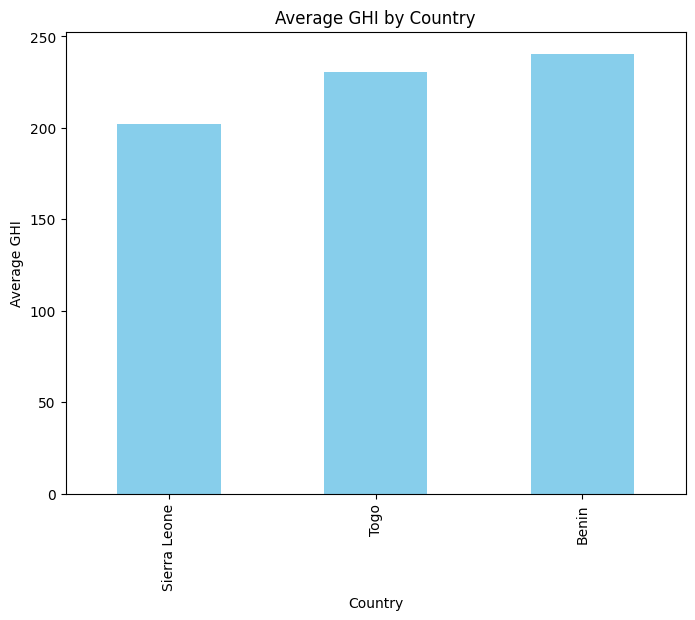

In [5]:
# Bar chart ranking countries by average GHI
average_ghi = combined_df.groupby('Country')['GHI'].mean().sort_values()

plt.figure(figsize=(8, 6))
average_ghi.plot(kind='bar', color='skyblue')
plt.title('Average GHI by Country')
plt.xlabel('Country')
plt.ylabel('Average GHI')
plt.show()